#### NLP 데이터는 어떻게 EDA((Exploratory Data Analysis)를 진행해야 할까?

### EDA란?

데이터를 분석하기 전에 그래프나 통계적인 방법으로 자료를 직관적으로 바라보는 과정

### EDA의 목적:

데이터의 분포 및 값을 검토함으로써 데이터가 표현하는 현상을 더 잘 이해하고, 데이터에 대한 잠재적인 문제를 발견할 수 있다. 

### EDA의 대략적인 과정:

1. 데이터를 전체적으로 살펴보기 : 데이터에 문제가 없는지 확인
 [라벨링 관련]
 - 라벨에 따른 데이터 수가 적절하게 분포되어 있는 지
 - 오라벨링된 데이터는 없는지 
 - 어떤 기준으로 라벨링이 되어있는지
  
 [내용적인 부분]
 - 중복된 데이터는 없는지
 - positive pair은 충분한지   *positive pair은 contrastive learning에서 같은 이미지로부터 augment된 데이터를 의미하는데, 여기서는 라벨이 상대적으로 유사한 데이터로 사용)
 
 [NLP task]
 - 문어체인지, 대화체인지 
 - 문법이 잘 적용된 데이터인지?, 띄어쓰기가 제대로 되어있는지?, 비문은 없는지?
 - 글자 외, 이모티콘이나, 다른 특수한 표현은 없는지?
 
 
2. 데이터의 개별 속성값을 관찰 : 각 속성 값이 예측한 범위와 분포를 갖는지 확인. 만약 그렇지 않다면, 이유가 무엇인지를 확인.
 - 수치가 이상한 데이터는 없는지
 - 값의 범위가 데이터 스키마(설명서)와 동일한지


3. 속성 간의 관계에 초점을 맞추어, 개별 속성 관찰에서 찾아내지 못했던 패턴을 발견 (상관관계, 시각화 등)

In [1]:
#!pip install seaborn
#!pip install sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
train = pd.read_csv('train.csv')
train

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0


### NA check

In [4]:
train.isnull().values.any()

False

### Column engineering

In [5]:
# 공백 기준으로 토큰 나누기
train['tokens_1'] = train['sentence_1'].apply(lambda x: x.split())
train['tokens_2'] = train['sentence_2'].apply(lambda x: x.split())

# 문장 길이, 토큰 개수 칼럼 추가하기
train['sen_len_1'] = train['sentence_1'].apply(lambda x: len(x))
train['sen_len_2'] = train['sentence_2'].apply(lambda x: len(x))

train['tkn_len_1'] = train['tokens_1'].apply(lambda x: len(x))
train['tkn_len_2'] = train['tokens_2'].apply(lambda x: len(x))

# 라벨 단순화
train['simple_label'] = train['label'].apply(lambda x: int(x))
train

,id,source,sentence_1,sentence_2,label,binary-label,tokens_1,tokens_2,sen_len_1,sen_len_2,tkn_len_1,tkn_len_2,simple_label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0,"[스릴도있고, 반전도, 있고, 여느, 한국영화, 쓰레기들하고는, 차원이, 다르네요~]","[반전도, 있고,사랑도, 있고재미도있네요.]",38,20,8,3,2
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0,"[앗, 제가, 접근권한이, 없다고, 뜹니다;;]","[오,, 액세스, 권한이, 없다고, 합니다.]",20,19,5,5,4
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0,"[주택청약조건, 변경해주세요.]","[주택청약, 무주택기준, 변경해주세요.]",14,18,2,3,2
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0,"[입사후, 처음, 대면으로, 만나, 반가웠습니다.]","[화상으로만, 보다가, 리얼로, 만나니, 정말, 반가웠습니다.]",22,28,5,6,3
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0,"[뿌듯뿌듯, 하네요!!]","[꼬옥, 실제로, 한번, 뵈어요, 뿌뿌뿌~!~!]",10,21,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0,"[교원능력개발평가에서, 교원이, 보호받을, 수, 있는, 장치를, 마련해야합니다]","[본인이, 납부한, 국민연금, 금액을, 기준으로, 대출을, 받을, 수, 있는, 제도...",36,45,7,12,0
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0,"[여성가족부의, 폐지를, 원합니드]","[여성가족부, 폐지를, 청원, 합니다.]",15,17,3,4,4
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0,"[국회의원들, 월급좀, 줄여주세요]","[공무원, 봉급좀, 줄이지좀, 마세요]",15,16,3,4,0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0,"[오늘, 못한, 점심은, 다음에, 다시, 츄라이, 하기로, 해요!!]","[오늘, 못먹은, 밥은, 꼭, 담에, 먹기로, 하고요!!]",29,24,8,7,3


### Label 별 데이터 수 시각화

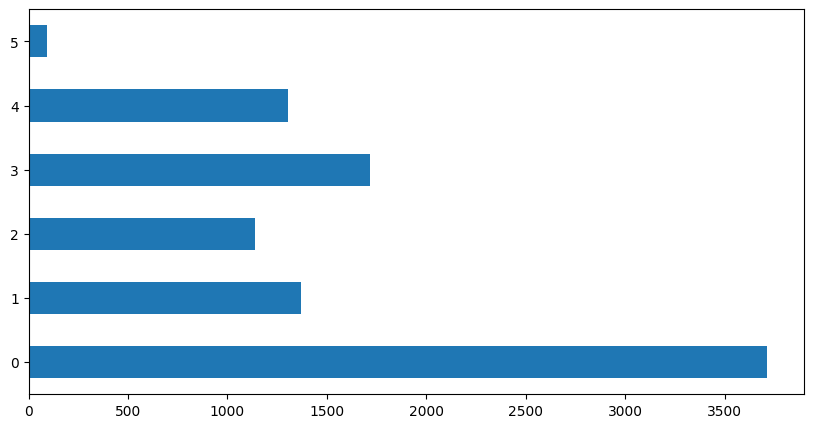

In [6]:
fig = plt.figure(figsize = (10, 5))
ax = train['simple_label'].value_counts().sort_index().plot(kind = 'barh')

label이 0인 데이터는 상당히 많지만 label이 5인 데이터는 매우 적다. 
label이 0인 데이터에서만 예측을 잘하거나 예측이 과하게 치우칠 가능성이 있다.

### Label 별 문장 길이 시각화

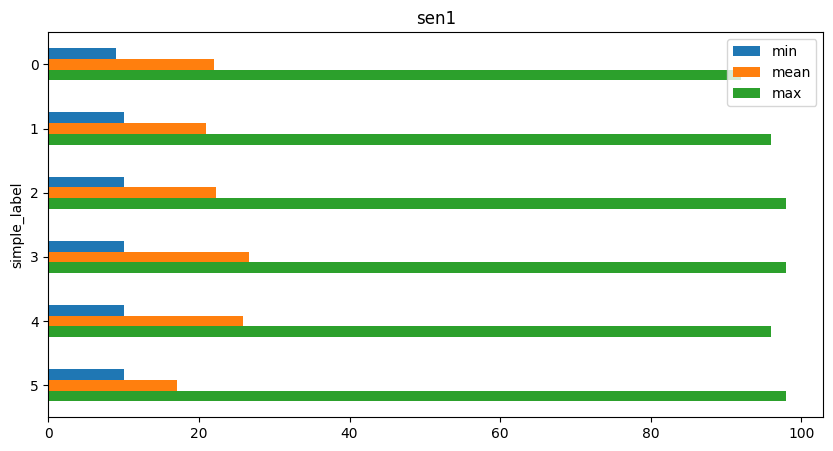

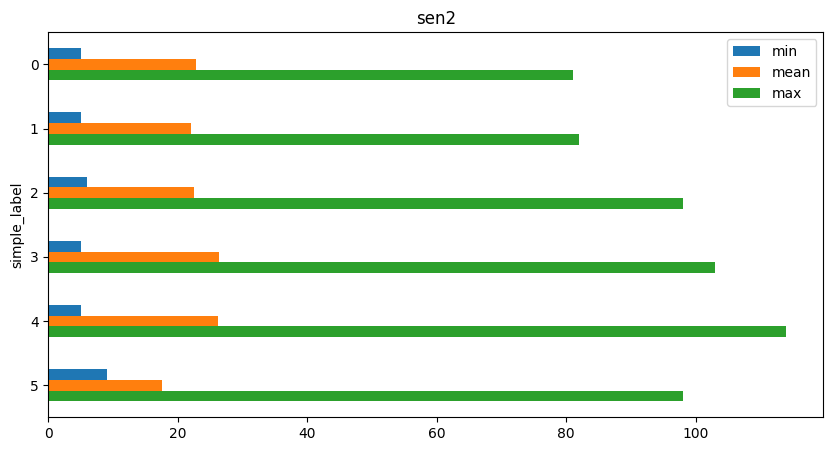

In [7]:
ax1 = fig.add_subplot(211)
ax1 = train.groupby('simple_label')['sen_len_1'].agg(['min','mean','max']).sort_index().plot(kind='barh', figsize = (10, 5))
ax1.set_title("sen1")
ax1.invert_yaxis()

ax2 = fig.add_subplot(212)
ax2 = train.groupby('simple_label')['sen_len_2'].agg(['min','mean','max']).sort_index().plot(kind='barh', figsize = (10, 5))
ax2.set_title("sen2")
ax2.invert_yaxis()

### Label 별 토큰 길이 시각화

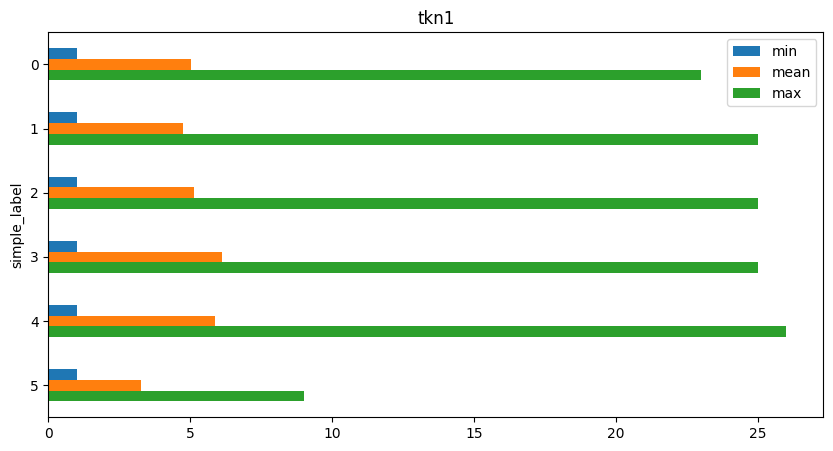

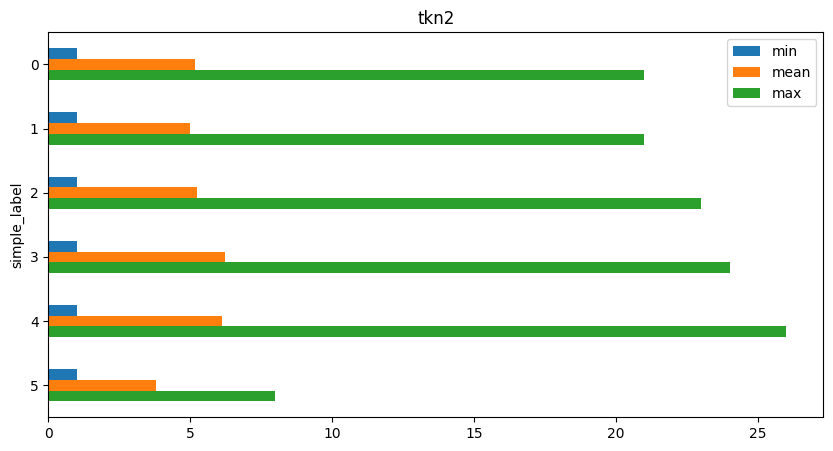

In [8]:
ax1 = fig.add_subplot(211)
ax1 = train.groupby('simple_label')['tkn_len_1'].agg(['min','mean','max']).sort_index().plot(kind='barh', figsize = (10, 5))
ax1.set_title("tkn1")
ax1.invert_yaxis()

ax2 = fig.add_subplot(212)
ax2 = train.groupby('simple_label')['tkn_len_2'].agg(['min','mean','max']).sort_index().plot(kind='barh', figsize = (10, 5))
ax2.set_title("tkn2")
ax2.invert_yaxis()

sentence 2가 1보다 문장 길이가 짧은 편이지만 유의미한 차이는 없다.
하지만 token의 경우 라벨이 5일 때 최대 토큰 개수가 매우 적다.
단어가 잘 나뉘어지지 않았거나 비문법적인 표현이 많이 사용됐을 가능성이 있다.

### 상관 계수 구하기

상관 계수는 두 변수 간의 직선관계를 나타낸다. 하지만 상관관계가 있다는 것은 인과관계가 있다는것이 아니다. 
상관관계 값이 0에 가까울수록 직선관계가 없으며, -1에 가까울수록 강한 음의관계, +1에 가까울수록 강한 양의 관계를 가진다.

/tmp/ipykernel_37220/721394596.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g = sns.heatmap(train.corr(), cmap= "Reds", annot_kws = {'size':20}, annot = True)


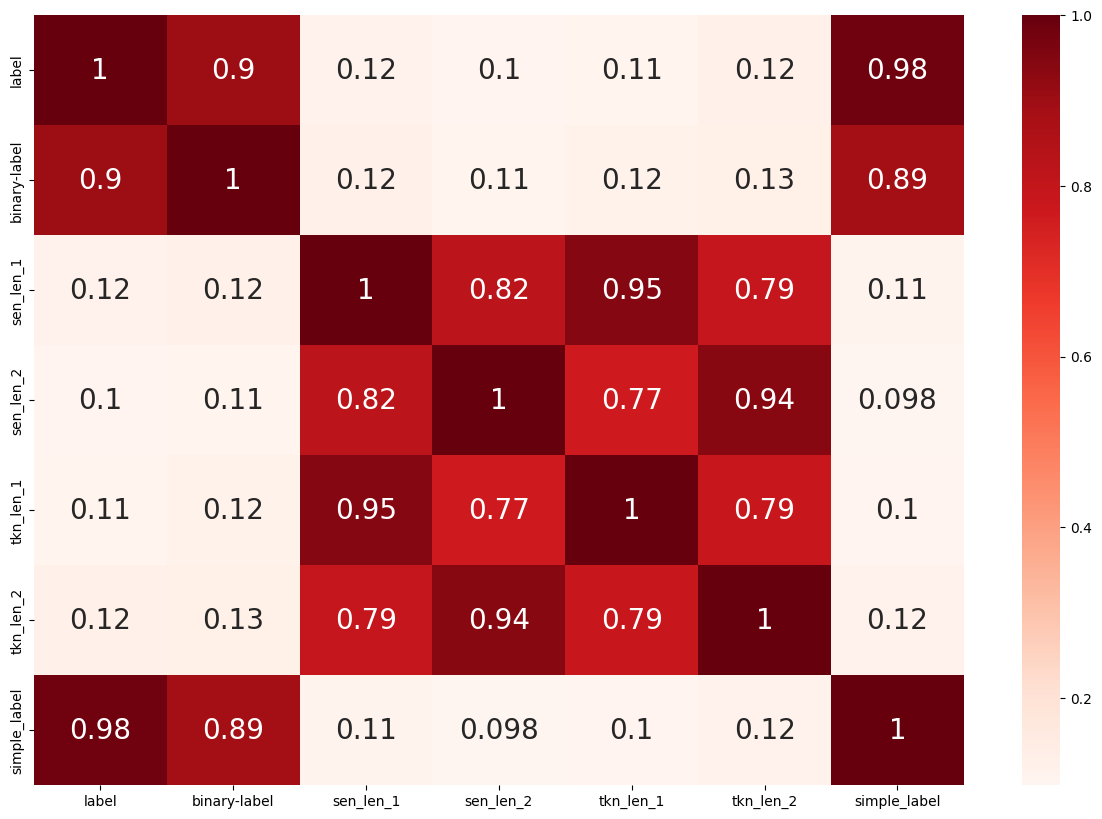

In [12]:
plt.figure(figsize = (15, 10))
g = sns.heatmap(train.corr(), cmap= "Reds", annot_kws = {'size':20}, annot = True)

### Source 별 데이터 수 시각화

In [13]:
train['source'].value_counts().sort_index()

nsmc-rtt             788
nsmc-sampled        2296
petition-rtt         817
petition-sampled    2352
slack-rtt           1047
slack-sampled       2024
Name: source, dtype: int64

Text(0.5, 4.444444444444445, 'Amounts of data')

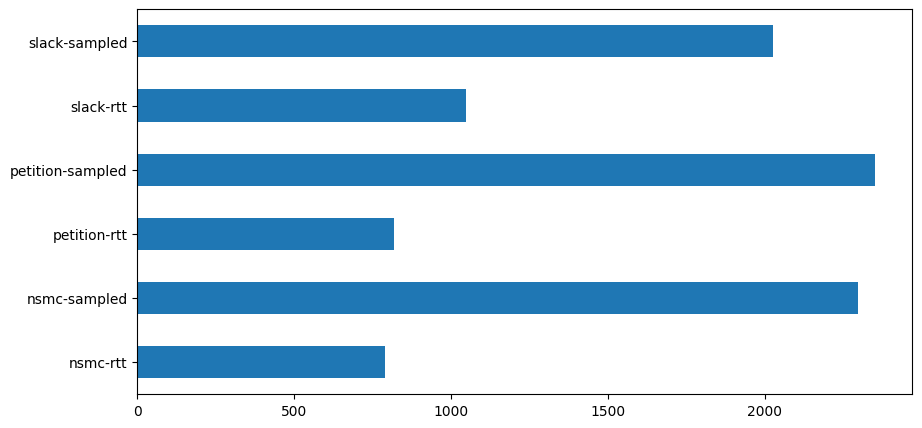

In [16]:
fig = plt.figure(figsize = (10,5))
ax1 = train['source'].value_counts().sort_index().plot(kind='barh')
ax.set_title("Number of data srcs")
ax.set_xlabel("Amounts of data")

In [ ]:
### N-gram

n-gram은 n개의 연속적인 단어 나열을 의미합니다. 갖고 있는 코퍼스에서 n개의 단어 뭉치 단위로 끊어서 이를 하나의 토큰으로 간주합니다. 
예를 들어서 문장 An adorable little boy is spreading smiles이 있을 때, 각 n에 대해서 n-gram을 전부 구해보면 다음과 같습니다.

unigrams : an, adorable, little, boy, is, spreading, smiles
bigrams : an adorable, adorable little, little boy, boy is, is spreading, spreading smiles
trigrams : an adorable little, adorable little boy, little boy is, boy is spreading, is spreading smiles
4-grams : an adorable little boy, adorable little boy is, little boy is spreading, boy is spreading smiles

In [21]:
from tqdm.notebook import tqdm

In [28]:
def get_n_grams(n_grams, sen, top_n = 10):
    df_words = pd.DataFrame()
    for dt in tqdm(sorted(list(train['simple_label'].unique()))):
        df = train.query('simple_label == @dt')
        texts = df['sentence_'+str(sen)].tolist()
        vec = CountVectorizer(ngram_range = (n_grams, n_grams)).fit(texts)
        BOW = vec.transform(texts)
        sum_words = BOW.sum(axis = 0)
        words_freq = [(word,sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        cvec_df = pd.DataFrame.from_records(words_freq, \
                                            columns = ['words', 'counts']).sort_values(by="counts", ascending = False)
        cvec_df.insert(0, "Label", dt)
        cvec_df = cvec_df.iloc[:top_n, :]
        df_words = pd.concat([df_words, cvec_df])
    return df_words

In [29]:
unigram = get_n_grams(n_grams = 1, sen = 1, top_n=5)
unigram

  0%|          | 0/6 [00:00<?, ?it/s]

,Label,words,counts
64,0,ㅋㅋ,139
259,0,영화,99
357,0,너무,92
363,0,ㅎㅎ,91
88,0,person,69
160,1,영화,49
83,1,너무,42
52,1,ㅋㅋ,39
43,1,정말,28
26,1,좋은,20
